Correlation between alcohol consumption and life expectancy: 0.41454749311993394


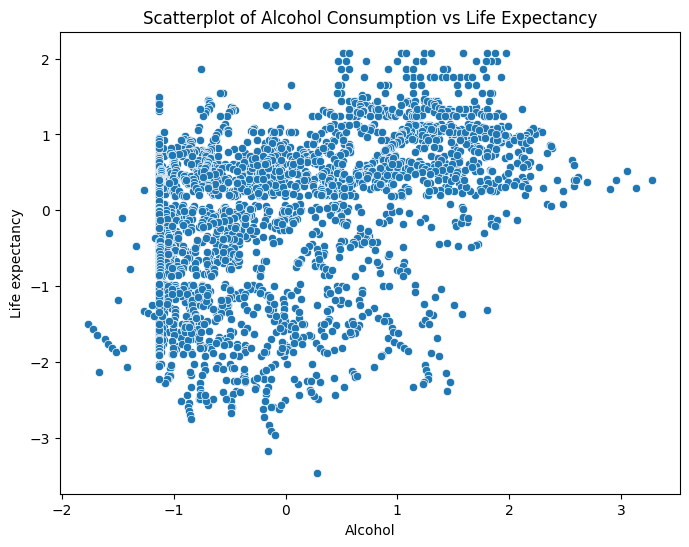

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('Cleaned-Life-Exp.csv')

df = (df[['Alcohol', 'Life expectancy']]).dropna()

correlation = df['Alcohol'].corr(df['Life expectancy'])
print(f'Correlation between alcohol consumption and life expectancy: {correlation}')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Alcohol', y='Life expectancy')
plt.title('Scatterplot of Alcohol Consumption vs Life Expectancy')
plt.show()


Correlations between immunization and life expectancy:
                 Life expectancy  Hepatitis B     Polio  Diphtheria
Life expectancy         1.000000     0.374444  0.470382    0.484297
Hepatitis B             0.374444     1.000000  0.584728    0.694897
Polio                   0.470382     0.584728  1.000000    0.675638
Diphtheria              0.484297     0.694897  0.675638    1.000000


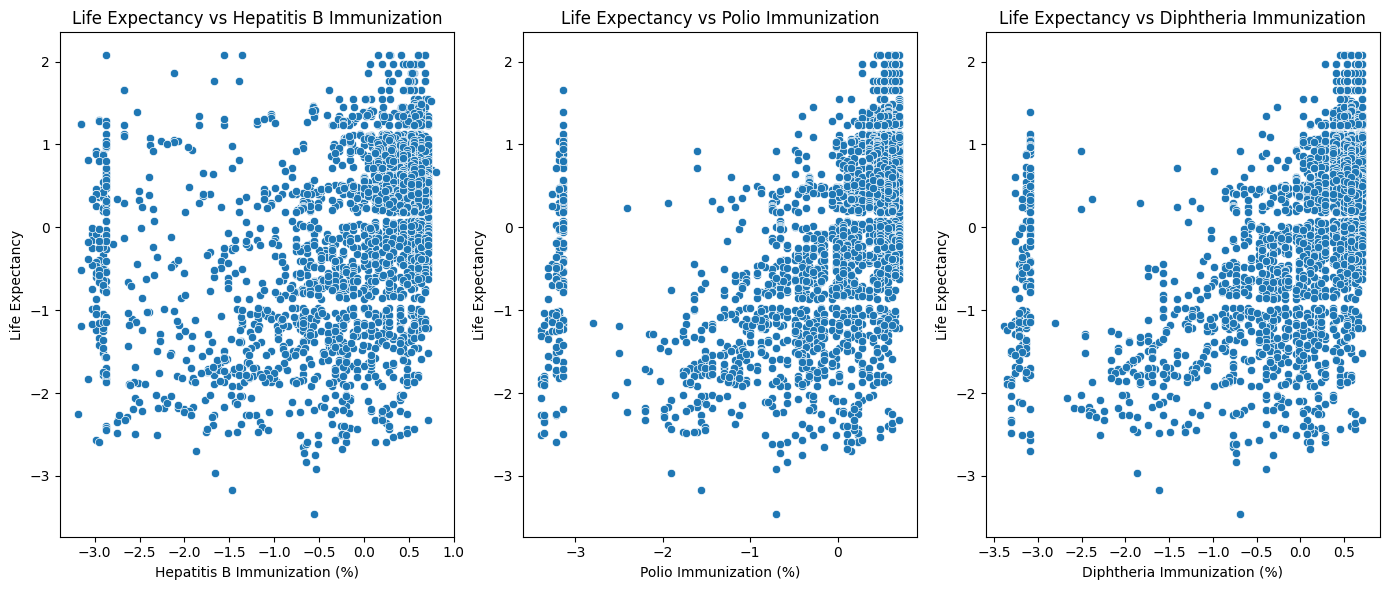

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     366.1
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          5.93e-202
Time:                        17:41:42   Log-Likelihood:                -3700.0
No. Observations:                2938   AIC:                             7408.
Df Residuals:                    2934   BIC:                             7432.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0048      0.016      0.305      

In [16]:
# Check the correlation between immunization rates and life expectancy
immunization_columns = ['Hepatitis B', 'Polio', 'Diphtheria']
correlations = df[['Life expectancy'] + immunization_columns].corr()

print("Correlations between immunization and life expectancy:")
print(correlations)

# Visualize the relationships using scatter plots
plt.figure(figsize=(14, 6))
for i, disease in enumerate(immunization_columns):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=disease, y='Life expectancy', data=df)
    plt.title(f'Life Expectancy vs {disease} Immunization')
    plt.xlabel(f'{disease} Immunization (%)')
    plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

# Run a simple linear regression to quantify the impact of immunization on life expectancy
X = df[immunization_columns]  # Independent variables (immunization rates)
y = df['Life expectancy']     # Dependent variable (life expectancy)

# Add constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())
